In [1]:
from stereo3d import stereo_read_from_pickle as std_read
from parsivel import pars_read_from_pickle as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np 
pars_file = "/home/marcio/stage_project/data/saved_events/pasivel01.obj"
stereo3d_file = "/home/marcio/stage_project/data/saved_events/stereo3d01.obj"
from plots.styles import BASEPARSIVELSTYLE as pars_style, BASESTEREOSTYLE as stereo_style

# Read all the data and extract one event

#### Select event from Stereo 3D

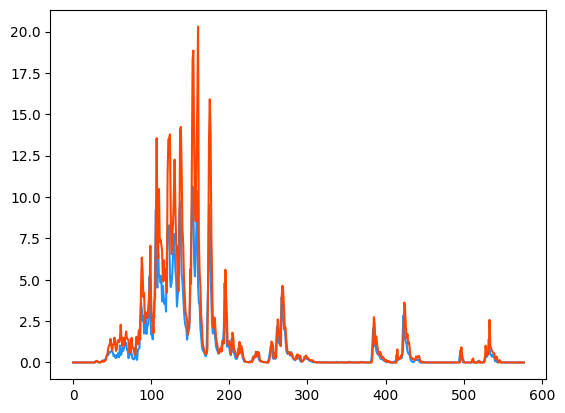

In [2]:
stereo_event = std_read(stereo3d_file)
pars_event = pars_read(pars_file)
figure, ax = plt.subplots()
ax.plot(stereo_event.rain_rate(), **stereo_style)
ax.plot(pars_event.rain_rate, **pars_style)

# Plotting The main indicators of 

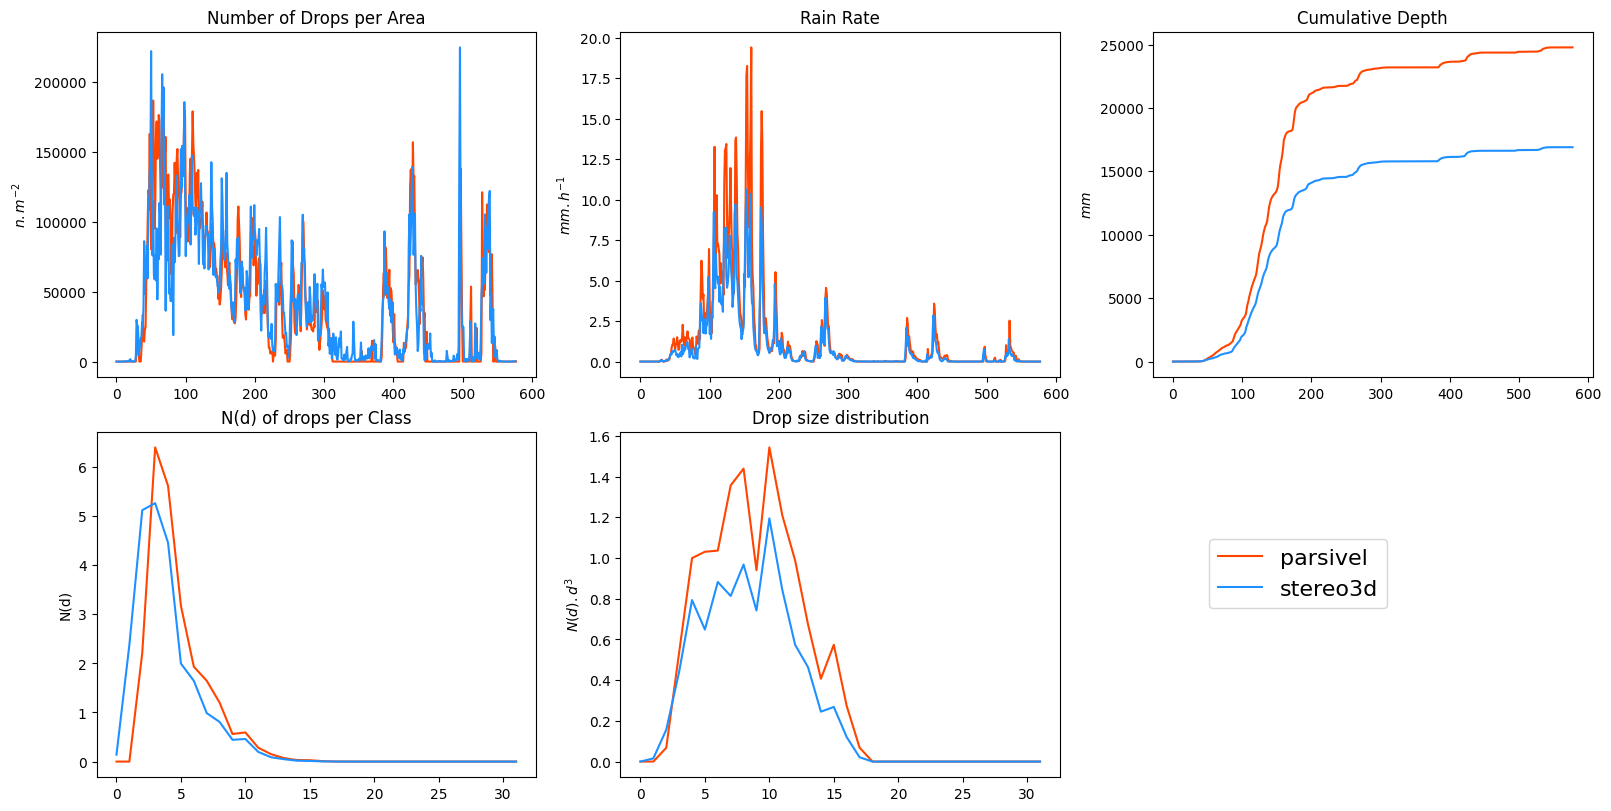

In [9]:
number_indicators = 5
ncols = 3
nrows = int(np.ceil(number_indicators / ncols))
counter = 1

figure = plt.figure()
# title = f"{pars_event.duration_readable[0]} : {pars_event.duration_readable[1]}"
# figure.suptitle(title, fontsize= 16)
figure.set_size_inches(16,nrows*4)
figure.set_constrained_layout(True)

# N(d) series
ax = figure.add_subplot(nrows, ncols, counter)
ax.plot(pars_event.npa, **pars_style)
ax.plot(stereo_event.npa, **stereo_style)
ax.set_title("Number of Drops per Area")
ax.set_ylabel("$n.m^{-2}$")
counter += 1

# Rain rate
ax = figure.add_subplot(nrows, ncols, counter)
ax.plot(pars_event.calculated_rate, **pars_style)
ax.plot(stereo_event.rain_rate(), **stereo_style)
ax.set_title("Rain Rate")
ax.set_ylabel("$mm.h^{-1}$")
counter += 1


# Cumulative rain Depth
ax = figure.add_subplot(nrows, ncols, counter)
ax.plot(pars_event.calculated_rain_depth, **pars_style)
ax.plot(stereo_event.cumulative_rain_depht(), **stereo_style)
ax.set_title("Cumulative Depth")
ax.set_ylabel("$mm$")
counter += 1

# Ndrops per Class
ax = figure.add_subplot(nrows, ncols, counter)
x, y = pars_event.ndrops_in_each_class
ax.plot(y, **pars_style)
x, y = stereo_event.ndrops_in_each_diameter_class
ax.plot(y, **stereo_style)
ax.set_title("N(d) of drops per Class")
ax.set_ylabel("N(d)")
counter += 1

# dsd per class
ax = figure.add_subplot(nrows, ncols, counter)
x, y = pars_event.ndrops_in_each_class
ax.plot([nd*(d**3) for nd, d in zip(y, x)], **pars_style)
x, y = stereo_event.ndrops_in_each_diameter_class
ax.plot([nd*(d**3) for nd, d in zip(y, x)], **stereo_style)
ax.set_title("Drop size distribution")
ax.set_ylabel("$N(d).d^{3}$")
counter += 1

handles, labels = ax.get_legend_handles_labels()
figure.legend(handles, labels, loc=(0.75,0.25), fontsize=16)

In [10]:
pars_event.duration_readable

('2023/07/28  07:04:00', '2023/07/28  11:52:30')

In [4]:
from aux_funcs.general import V_D_Lhermitte_1988
from sklearn.metrics import r2_score
lnx = np.linspace(0,4,100)
lny = V_D_Lhermitte_1988(lnx)